# Difusión de la información

In [1]:
# Importamos las librerías necesarias

%matplotlib inline
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Tal y como hemos vivido en primera persona durante la pandemia de la COVID-19, las intervenciones para frenar la expansión de una enfermedad infecciosa pueden clasificarse en tres grandes grupos:
- Medidas que reducen la transmisibilidad.
- Medidas que reducen los contactos.
- Campañas de vacunación.

En este ejercicio vamos a estudiar la efectividad de las tres intervenciones, usando un modelo muy sencillo de propagación epidémica.

Usaremos la red de aeropuertos de Estados Unidos, donde cada nodo representa un aeropuerto y un enlace significa que hay al menos un vuelo entre los dos aeropuertos.

Para simular la propagación de la enfermedad utilizaremos la siguiente función *propagate*, la cual ha sido proporcionada en las actividades llevadas a cabo en la UOC (Universitat Oberta de Catalunya):

In [2]:
import random

def propagate(network, seed, probability, steps):
    infected = [seed]
    pocket = [seed]
    time = 0
    while time < steps:
        time += 1
        # propagate
        new_pocket = []
        for seed in pocket:
            for node in network.neighbors(seed):
                if node not in infected and random.random() < probability:
                    infected.append(node)
                    new_pocket.append(node)
        pocket = new_pocket[:]
    return len(infected)

**Carga de la red airports.net y comprobación de sus componentes.**

En el archivo airports.net tenemos datos correspondiente a los enlaces entre los nodos, así que podemos hacer una carga directa del grafo mediante *read_edgelist()*:

In [3]:
G = nx.read_edgelist("data/airports.net")
nx.info(G)

'Graph with 940 nodes and 3446 edges'

Tenemos un total de 940 nodos y 3446 enlaces entre ellos.

Comprobamos cuántas componentes tenemos:

In [4]:
nx.number_connected_components(G)

1

Tenemos sólo un componente que contiene todos los nodos.

Vemos visualmente el grafo:

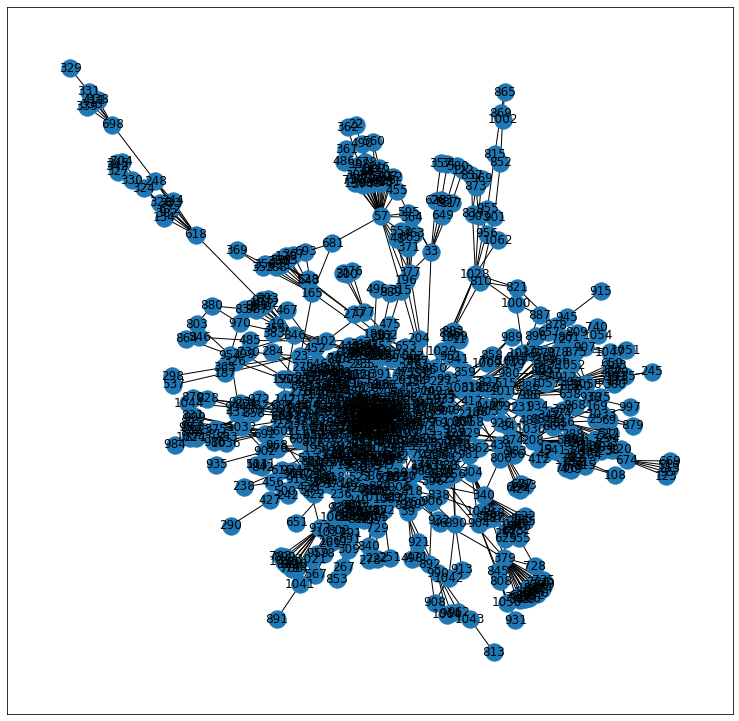

In [5]:
plt.figure(num=None, figsize=(13, 13))
pos = nx.spring_layout(G, seed=123)
nx.draw_networkx(G, pos=pos)

Visualmente podemos hacernos una idea de que existen aeropuertos más importantes que otros.

**Iteramos la función propagate por 100 nodos escogidos de forma aleatoria, con probability=0.5 y steps=2.**

Antes de iterar la función seleccionaremos 100 números aleatorios que corresponderán a 100 nodos de la red. Utilizaremos la función *sample()* de la librería *random*.

In [6]:
seeds = random.sample(list(G.nodes), 100)

Como utilizaremos este procedimiento también en los siguientes apartados, crearemos una función que itere n veces la función *propagate* y obtenga la media de infectados. n corresponderá al total de nodos 'paciente cero' que le pasemos a la función.

In [7]:
def calculate_mean_infectats(network, seeds, probability, steps):
    infectats = []
    for node in seeds:
        infectats.append(propagate(network, node, probability, steps))
    return np.mean(infectats)

In [8]:
mitjana_infectats = calculate_mean_infectats(G, seeds, 0.5, 2)
mitjana_infectats

47.2

**Calculamos el número medio de nodos infectados e indicamos la fracción de la población que representa**

Ya tenemos la media calculada, obtenemos también el porcentaje que representan del total de nodos y después los imprimimos por pantalla con *print()*.

In [9]:
frac_infectats = round((mitjana_infectats*100)/len(G.nodes),2)

In [10]:
print("El número medio de nodos infectados se: ", mitjana_infectats)

El número medio de nodos infectados se:  47.2


In [11]:
print("Este número de infectados representa el", frac_infectats,"% del total de nodos")

Este número de infectados representa el 5.02 % del total de nodos


**Repetimos el cálculo del ejercicio anterior (media sobre 100 seeds con steps=2) para valores de la probabilidad 𝑝=0.05,0.10,...,0.50.**

Utilizaremos la función anterior con los mismos nodos como pacientes cero pero iterando en un bucle para los distintos valores de *p*.

In [12]:
probabilitats = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]

mitjanes_infectats = []

for p in probabilitats:
    mitjanes_infectats.append(calculate_mean_infectats(G, seeds, p, 2))
    
# Vemos las medias obtenidas para cada p
mitjanes_infectats

[2.32, 5.04, 9.57, 15.1, 16.23, 22.57, 29.57, 34.35, 42.28, 47.74]

**Hagamos un gráfico de la media en función de 𝑝.**

Text(0, 0.5, 'Media infectados')

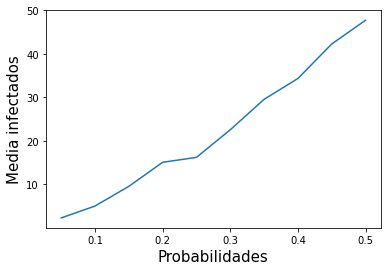

In [13]:
plt.plot(probabilitats, mitjanes_infectats)
plt.xlabel('Probabilidades', fontsize=15)
plt.ylabel('Media infectados', fontsize=15)

**Comentario a los resultados**

Gráficamente, podemos ver de forma rápida cómo aumenta la media de nodos infectados al aumentar la probabilidad de infectar a los nodos vecinos. Se ha obtenido un mayor número de infectados con p = 0.5. Esto es lógico, ya que al aumentar su probabilidad de infección más nodos vecinos se infectara ya la vez éstos en el segundo paso tendrán más probabilidades de infectar a sus nodos vecinos.

**Repetimos ahora el cálculo del ejercicio anterior por steps=1, steps=2 y steps=3.**

Mediante un bucle similar al del apartado anterior calcularemos las medias de cada probabilidad para 1, 2 y 3 pasos de la función *propagate()*. Vamos a utilizar los mismos nodos pacientes cero y las mismas probabilidades utilizadas hasta ahora.

In [14]:
steps = [1,2,3]

mitjanes_infectats_steps = []

for s in steps:
    aux = []
    for p in probabilitats:
        aux.append(calculate_mean_infectats(G, seeds, p, s))
    mitjanes_infectats_steps.append(aux)

# Comprobamos
mitjanes_infectats_steps

[[1.36, 1.8, 2.22, 2.52, 2.91, 3.14, 3.65, 4.06, 4.46, 4.86],
 [2.25, 5.15, 8.84, 12.8, 18.84, 25.07, 30.47, 35.93, 41.71, 45.41],
 [4.59, 8.98, 27.98, 36.44, 65.13, 82.49, 96.57, 116.62, 136.56, 154.94]]

Hemos obtenido una lista con 3 secuencias de medias, una para cada valor de *steps*.

**Hagamos un solo gráfico con las tres curvas de la media en función de 𝑝.**

Text(0, 0.5, 'Media infectados')

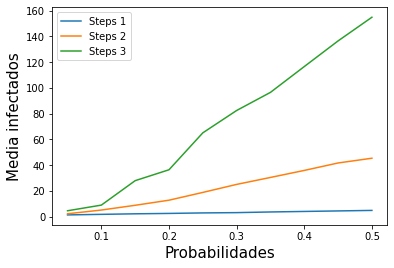

In [15]:
plt.plot(probabilitats, mitjanes_infectats_steps[0], label = "Steps 1")
plt.plot(probabilitats, mitjanes_infectats_steps[1], label = "Steps 2")
plt.plot(probabilitats, mitjanes_infectats_steps[2], label = "Steps 3")

plt.legend()

plt.xlabel('Probabilidades', fontsize=15)
plt.ylabel('Media infectados', fontsize=15)

**Comentarios en el resultado**

Con la comparación de las tres curvas podemos ver el rápido aumento que toma una posible enfermedad a medida que los vecinos contagiados van contagiando a sus vecinos. En la curva correspondiente a steps = 3 vemos cómo, aunque la enfermedad no tenga una gran probabilidad de infección, ya toma bastante distancia respecto a las curvas de steps = 1 y steps = 2. A más pasos, mayor es el incremento de la pendiente de la curva, la media de infectados crece más rápidamente.

Que ocurra esto es lógico, ya que tenemos una red donde todos los nodos vecinos (a excepción de los que ya están infectados) son susceptibles de ser infectados. Los vecinos del paciente cero que resultan infectados pueden infectar a los suyos veían y así paso a paso.

También puede darse el caso en el que vemos picos más pronunciados de la propagación de la enfermedad. Esto puede ocurrir porque cuando cojamos los 100 nodos como pacientes cero puede darse el caso de que cojamos un nodo con un grado elevado. Este nodo infectado se convertiría en un supercontagiador.

---
### Distanciamiento social

Ya hemos visto cómo se propagaría la enfermedad en una red totalmente conectada. Vamos a aplicar ahora la medida del distanciamiento social que ha sido aplicada por distintos países para frenar la COVID-19.

Para simular este distanciamiento, eliminaremos enlaces entre los nodos.

Para llevar a cabo este apartado crearemos dos funciones, una que será la encargada de eliminar una fracción p de los enlaces de una red y otra que devolverá la fracción de nodos de la componente gigante de una red respecto a un número dado .

**A partir de una red, construimos una nueva donde se haya eliminado una fracción 𝑝 de los enlaces.**

Creamos primero la función que simulará el distanciamiento social:

In [16]:
def distanciament_social(network, p):
    # Obtenemos los enlaces de la red
    edges = network.edges
    
    # Calculamos el total de enlaces a eliminar según el valor de p
    n_delete = int(len(edges)*p)
    
    # Seleccionamos n enlaces de la red aleatoriamente
    edges_to_remove = random.sample(list(edges), n_delete)
    
    # Copiamos la red en una nueva variable y eliminamos los enlaces seleccionados
    network_copy = network.copy()
    network_copy.remove_edges_from(edges_to_remove)
    
    # Devolvemos la nueva red sin estos enlaces
    return network_copy

**Encontramos el número de nodos que pertenecen a la componente gigante de la nueva red y calcula la fracción respecto al número total de nodos de la red original.**

Ahora creamos la otra función:

In [17]:
def nodes_comp_gegant(n, network):
    # Obtenemos la componente gigante de la red
    G_gegant = max(nx.connected_components(network), key=len)
    G_gegant = G.subgraph(G_gegant)

    # Devolvemos la fracción que representan estos nodos frente a n
    return(len(G_gegant.nodes)/n)

 **Calculem la fracció estimada d'infectats amb una probabilitat  𝑝=0.2 .**

In [18]:
g_aux = distanciament_social(G, 0.2)
print("La fracción estimada de infectado con p = 0,2 es: ",round(nodes_comp_gegant(len(G.nodes), g_aux),2))

La fracción estimada de infectado con p = 0,2 es:  0.92


**Ahora escribimos una función que iteri el cálculo del ejercicio anterior y calcule la media.**

A partir de las funciones anteriores crearemos una función que itere el cálculo de la fracción estimada de infectados y calcule la media.

Más adelante simularemos el efecto de la campaña de vacunación y utilizaremos una función muy similar a ésta, pero habrá que eliminar los nodos y no las aristas, será necesario una función diferente de *distanciament_social()*. Para poder reutilizar una función que iterará n veces y calculará la media en ambos casos pasaremos la función a aplicar en la red en el parámetro *funcion*.

In [19]:
def mean_frac(n, funcio, fraccions, network):
    mitjanes = []
    
    # Recorremos el array con los posibles valores de p
    for p in fraccions:
        aux = 0
        # Repetimos el cálculo n veces y obtenemos la media
        # Dependiendo de la función eliminará nodos o aristas
        for i in range(n):
            aux += (nodes_comp_gegant(len(network.nodes), funcio(network,p)))    
            
        # Añadimos la media al array medias
        mitjanes.append(aux/n)

    # Devolvemos el array con las medias de los distintos valores de p
    return mitjanes

**Repetimos el cálculo por p = 0.05, 0.10, ..., 0.50**

Iteraremos 100 veces el cálculo.

In [20]:
fraccions = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5]
mitjanes_distanciament = mean_frac(100, distanciament_social, fraccions, G)

# Comprobamos
mitjanes_distanciament

[0.9849893617021277,
 0.9679148936170211,
 0.9472234042553191,
 0.9237446808510638,
 0.8941382978723407,
 0.8633510638297868,
 0.8278191489361701,
 0.7853829787234043,
 0.7420425531914896,
 0.6866276595744679]

**Hagamos un gráfico de la media en función de 𝑝 .**

Text(0, 0.5, 'medias')

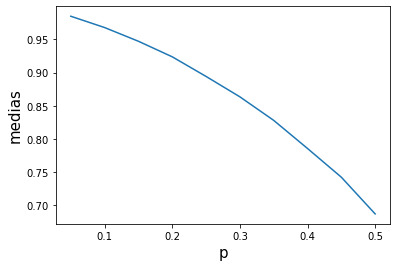

In [21]:
plt.plot(fraccions, mitjanes_distanciament)
plt.xlabel('p', fontsize=15)
plt.ylabel('medias', fontsize=15)

**Comentario de los resultados**

Con el gráfico podemos ver cómo la fracción de infectados respecto al total de nodos se reduce a medida que va aumentando el valor de p. Con p = 0.5 obtenemos la menor media de infectados respecto al total. Esto significa que evitando relaciones entre los nodos susceptibles a ser infectados y posibles nodos infectados reducimos la propagación de la infección.

Éste sería un sistema susceptible-infectado donde cada nodo puede ser infectado y una vez es infectado puede infectar al resto de nodos. En el peor de los casos este sistema infectará a todos los nodos que estén conectados entre sí. Como hemos visto, si aislamos los nodos haciendo que no todos estén conectados entre sí estaremos reduciendo el número total de nodos que pueden ser infectados.

---
### Campañas de vacunación

Como hemos dicho antes, simularemos ahora el efecto de una campaña de vacunación en la difusión de la enfermedad. Para realizar esta simulación eliminaremos nodos de la red que representarán a personas ya vacunadas.

---

**A partir de una red, construimos una nueva donde se haya eliminado una fracción 𝑝 de los nodos.**

Definimos una función muy similar a *distanciament_social()*, pero eliminaremos los nodos en vez de las aristas:

In [22]:
def vacunacio(network, p):
    nodes = network.nodes
    n_delete = int(len(nodes)*p)
    nodes_to_remove = random.sample(list(nodes), n_delete)
    
    network_copy = network.copy()
    network_copy.remove_nodes_from(nodes_to_remove)
    
    return network_copy

**Reusando funciones anteriores calculamos la fracción estimada de infectados con una probabilidad 𝑝=0.2 .**

Con la función *vacunacio()* que acabamos de crear y la función *nodes_comp_gegant()* creada en el anterior punto realizamos el cálculo para un p = 0.2:

In [23]:
g_aux = vacunacio(G, 0.2)
print("La fracción estimada de infectado con p = 0,2 es: ",round(nodes_comp_gegant(len(G.nodes), g_aux),2))

La fracción estimada de infectado con p = 0,2 es:  0.7


**Iterimos el cálculo del ejercicio anterior y calculamos la media por 𝑝=0.05,0.10,...,0.50 .**

Sigamos el mismo procedimiento que hemos realizado con el cálculo del distanciamiento social para estos valores de p. Reutilizaremos la variable fracciones.

In [24]:
mitjanes_vacunacio = mean_frac(100, vacunacio, fraccions, G)

# Comprobamos
mitjanes_vacunacio

[0.9207234042553192,
 0.8465319148936169,
 0.7677340425531916,
 0.694563829787234,
 0.6202021276595743,
 0.5452978723404253,
 0.4769042553191491,
 0.41358510638297874,
 0.35306382978723405,
 0.2964999999999998]

**Hagamos un gráfico de la media en función de 𝑝 .**

Text(0, 0.5, 'medias')

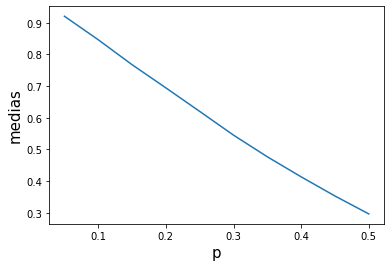

In [25]:
plt.plot(fraccions, mitjanes_vacunacio)
plt.xlabel('p', fontsize=15)
plt.ylabel('medias', fontsize=15)

**Comentario de los resultados**
 
Fijándonos en el gráfico observamos que se produce una curva similar con algo más de pendiente. Pero si nos fijamos bien en el rango de las medias de la fracción de infectados, nos daremos cuenta de que se han reducido mucho más. En el distanciamiento social con p = 0.5 nos quedábamos con una fracción en torno al 70% de los nodos totales. Con la estrategia de vacunación llegamos hasta tener sólo el 30% de infectados. Parece que la estrategia de vacunación es más efectiva que sólo el distanciamiento social.

**Hagamos ahora un gráfico de la media en función de 𝑝 comparando las dos estrategias.**

Text(0, 0.5, 'media')

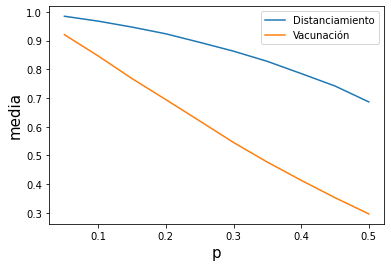

In [26]:
plt.plot(fraccions, mitjanes_distanciament, label = "Distanciamiento")
plt.plot(fraccions, mitjanes_vacunacio, label = "Vacunación")

plt.legend()

plt.xlabel('p', fontsize=15)
plt.ylabel('media', fontsize=15)

**Comentario de los resultados:**

Comparando ambas curvas podemos ver claramente que la estrategia de vacunación es mucho más efectiva para frenar la transmisión de una enfermedad que el distanciamiento social. El descenso de la curva perteneciente al distanciamiento es mucho menos pronunciado que el descenso de la curva correspondiente a la vacunación.

**Con lo que hemos visto del efecto del distanciamiento social y de la campaña de vacunación nos sale una cuestión, ¿qué pasaría si se combinaran ambas estrategias?**

Si juntamos ambas estrategias para la misma red seguramente obtendremos mejores resultados que con cualquiera de las dos por separado. Aunque no creamos que mejoras mucho la estrategia de vacunación.

En este sistema cuando un nodo se vacuna ya no podrá transmitir la enfermedad y lo hemos simulado eliminándolo de la red. Al eliminar el nodo estamos eliminando también todas sus aristas, por tanto, el número de aristas que se eliminan en la función *distanciament_social()* seguramente será menor que las que se eliminan en la función de *vacunació()* .

Por eso no creemos que variará tanto cuando apliquemos las dos estrategias. Viendo las curvas también podemos hacernos una idea, puesto que la aceleración en el descenso de una a otra es bastante diferente.

Podemos comprobar si esto es cierto aplicando ambas estrategias en la red. Simularemos lo que se ha hecho para frenar la transmisión de la COVID-19, primero se aplicaron medidas de distanciamiento social y cuando fue posible se empezó a vacunar a la población. Así que primero aplicaremos la función *distanciament_social()* y en la red resultante le aplicaremos la función *vacunació()*.

Utilizaremos los mismos valores de p y las mismas iteraciones.

In [27]:
# Como sólo lo utilizaremos en este punto no es necesario adaptar la función mean_frac()
# Utilizaremos este bucle que hace lo mismo que la función pero aplicando ambas estrategias
mitjanes_combinada = []
for p in fraccions:
    aux = 0
    for i in range(100):
        # Obtenemos la red con distanciamiento
        G_aux = distanciament_social(G,p)
        
        # Aplicamos vacunacio() a esta red
        aux += (nodes_comp_gegant(len(G.nodes), vacunacio(G_aux,p)))    
    mitjanes_combinada.append(aux/100)

# Comprobamos
mitjanes_combinada

[0.9058191489361701,
 0.815212765957447,
 0.7178617021276592,
 0.6204148936170213,
 0.5296914893617022,
 0.4391489361702127,
 0.3685851063829787,
 0.29443617021276597,
 0.23156382978723408,
 0.18385106382978716]

Vemos las tres curvas juntas en un gráfico:

Text(0, 0.5, 'mitjana')

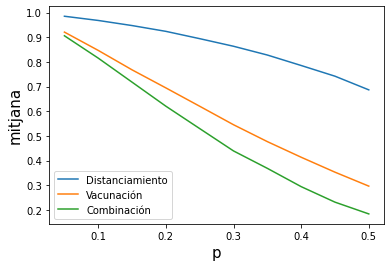

In [28]:
plt.plot(fraccions, mitjanes_distanciament, label = "Distanciamiento")
plt.plot(fraccions, mitjanes_vacunacio, label = "Vacunación")
plt.plot(fraccions, mitjanes_combinada, label = "Combinación")

plt.legend()

plt.xlabel('p', fontsize=15)
plt.ylabel('mitjana', fontsize=15)

Tal y como prevemos, la estrategia combinada mejora cualquiera de las anteriores estrategias aplicadas individualmente. Pero la diferencia entre la estrategia combinada y la vacunación es mucho menor que entre la vacunación y el distanciamiento social.

## Conclusiones

Hemos simulado cómo sería la propagación de una enfermedad en un sistema susceptible-infectado. También hemos visto algunas de las medidas que se han llevado a cabo en la actualidad para frenar la expansión contra la COVID-19 como el distanciamiento social y la vacunación.

Después de analizar las distintas estrategias hemos llegado a la conclusión de que la mejor estrategia es combinar ambas estrategias, aunque la diferencia entre esta combinación y aplicar sólo vacunación no es muy grande. Esto podría ser también aplicable a la COVID-19 viendo las medidas que se están llevando a cabo por el gobierno Español y los distintos gobiernos autonómicos donde se está persuadiendo a que la gente que todavía no esté vacunada lo haga y por ahora descartan, [cómo es el caso del gobierno Valenciano](https://www.levante-emv.com/comunitat-valenciana/2021/10/24/puig-descarta-nuevas-restricciones-pone-58735867.html), aplicar medidas restrictivas.